In [ ]:
import pyspark.sql.functions as F

In [ ]:
comment = spark.read.parquet("/FileStore/tables/comments_all")
print("Comments Counts: ", comment.count())
print("Number of Columns: ", len(comment.columns))
print("[deleted] Counts: ", comment.filter(F.col("body") == "[deleted]").count())
print("No-text Counts: ", comment.filter(F.col("body") == "").count())
comment.take(1)

Comments Counts: 9993790
Number of Columns: 22
[deleted] Counts: 367528
No-text Counts: 25
Out[11]: [Row(author='graybeard5529', author_cakeday=None, author_flair_css_class=None, author_flair_text=None, body='5,000+ body bags? \n\n(If that is true and correct).\n\nDomestic economic crisis?\n\nPutin is finished --it is just a matter of time ...', can_gild=True, controversiality=0, created_utc='2022-03-03 12:04:09', distinguished=None, edited='false', gilded=0, id='hz68p16', is_submitter=False, link_id='t3_t5mia9', parent_id='t3_t5mia9', permalink='/r/UkrainianConflict/comments/t5mia9/6500_people_arested_during_antiwar_protests_in/hz68p16/', retrieved_on=1655804143, score=1, stickied=False, subreddit='UkrainianConflict', subreddit_id='t5_30hhs', created_date=datetime.date(2022, 3, 3))]

In [ ]:
!pip install pyspark_dist_explore
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
from IPython.display import display
import pyspark.sql.functions as F
from pyspark.sql.functions import col

Requirement already satisfied: pyspark_dist_explore in /databricks/python3/lib/python3.8/site-packages (0.1.8)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from pyspark_dist_explore) (1.21.6)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from pyspark_dist_explore) (1.2.4)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from pyspark_dist_explore) (3.4.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from pyspark_dist_explore) (1.6.2)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->pyspark_dist_explore) (2.8.1)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->pyspark_dist_explore) (9.0.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->pyspark_dist_explore) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->pyspark_dist_explore) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->pyspark_dist_explore) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->pyspark_dist_explore) (1.15.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas->pyspark_dist_explore) (2020.5)
 WARNING: You are using pip version 21.0.1; however, version 22.3.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [ ]:
comment_dist_plot = comment.withColumn('body_length', F.size(F.split(F.col('body'), ' ')))
filtered_by_submitter_T = comment_dist_plot.filter(F.col('is_submitter')==True).select(F.col('body_length').alias('submitter'))
filtered_by_submitter_F = comment_dist_plot.filter(F.col('is_submitter')==False).select(F.col('body_length').alias('commenter'))
filtered_by_score_low = comment_dist_plot.filter(F.col('score')<=avg_score).select(F.col('body_length').alias('Under Average Score'))
filtered_by_score_high = comment_dist_plot.filter(F.col('score')>avg_score).select(F.col('body_length').alias('Above Average Score')) 

Out[18]:

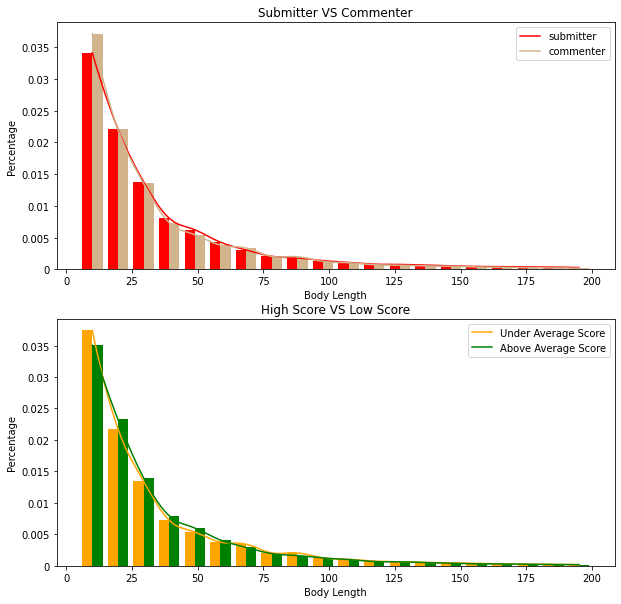

<matplotlib.legend.Legend at 0x7f1d9803ffa0>

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
distplot(axes[0], [filtered_by_submitter_T, filtered_by_submitter_F], bins = 20, color=['red', 'tan'])
axes[0].set_axisbelow(True)
axes[0].set_xlabel('Body Length')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Submitter VS Commenter')
tmp_handles, tmp_labels = axes[0].get_legend_handles_labels()
clean_handles, clean_labels = list(tmp_handles)[:2], list(tmp_labels)[:2]
axes[0].legend(clean_handles, clean_labels)

distplot(axes[1], [filtered_by_score_low, filtered_by_score_high], bins=20, color=['orange', 'green'])
axes[1].set_axisbelow(True)
axes[1].set_xlabel('Body Length')
axes[1].set_ylabel('Percentage')
axes[1].set_title('High Score VS Low Score')
tmp_handles, tmp_labels = axes[1].get_legend_handles_labels()
clean_handles, clean_labels = list(tmp_handles)[:2], list(tmp_labels)[:2]
axes[1].legend(clean_handles, clean_labels)